We’ll be making a movie recommendation system which is based on ratings given to a movie by different users. Start by importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np

Data Preparation¶

Recommendation systems require a very large dataset. For this model, we’ll be using a dataset of 100k movies. Load the dataset. The columns of this data frame do not have names. So, we’ll give a name to every column.

In [2]:
columns_name=['user_id','item_id','rating','timestamp']
df = pd.read_csv("ml-100k/u.data", sep="\t", names=columns_name)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
#We'll also get the name of the movies

movies = pd.read_csv("ml-100k/u.item", sep='|', header=None, encoding='latin-1')

In [5]:
movies.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
#There are other columns included here we may just need column '1', i.e Movi Name

movies = movies[[0,1]]

In [7]:
movies.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
#let's give the name to movies data

movies.columns = ['item_id', 'title']
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
#Now we merge both the dataframes

data = pd.merge(df,movies, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [10]:
#Optional method

movies = pd.read_csv("ml-100k/u.item", sep='|', header=None, encoding='latin-1')
movies.columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL'] + [f'genre_{i}' for i in range(19)]

In [11]:
data = pd.merge(df, movies, left_on='item_id', right_on='movie_id')
data.head()

,user_id,item_id,rating,timestamp,movie_id,title,release_date,video_release_date,IMDb_URL,genre_0,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data = data[['user_id', 'item_id', 'rating', 'timestamp', 'movie_id', 'title']]
data.head()

,user_id,item_id,rating,timestamp,movie_id,title
0,196,242,3,881250949,242,Kolya (1996)
1,63,242,3,875747190,242,Kolya (1996)
2,226,242,5,883888671,242,Kolya (1996)
3,154,242,3,879138235,242,Kolya (1996)
4,306,242,5,876503793,242,Kolya (1996)


In [13]:
avg_rating = data.groupby('title').mean()['rating'].sort_values(ascending=False)
avg_rating

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [14]:
#Let's also find the number of ratings a paticular movi has recived

rating_on_movi = data.groupby('title').count()['rating'].sort_values(ascending=False)
rating_on_movi

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [15]:
ratings=pd.DataFrame(data.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(data.groupby("title").count()["rating"])
print(ratings.head())

                             rating  number of ratings
title                                                 
'Til There Was You (1997)  2.333333                  9
1-900 (1994)               2.600000                  5
101 Dalmatians (1996)      2.908257                109
12 Angry Men (1957)        4.344000                125
187 (1997)                 3.024390                 41


In [16]:
ratings.sort_values(by = 'rating', ascending=False)

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


Exploratory Data Analysis¶

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

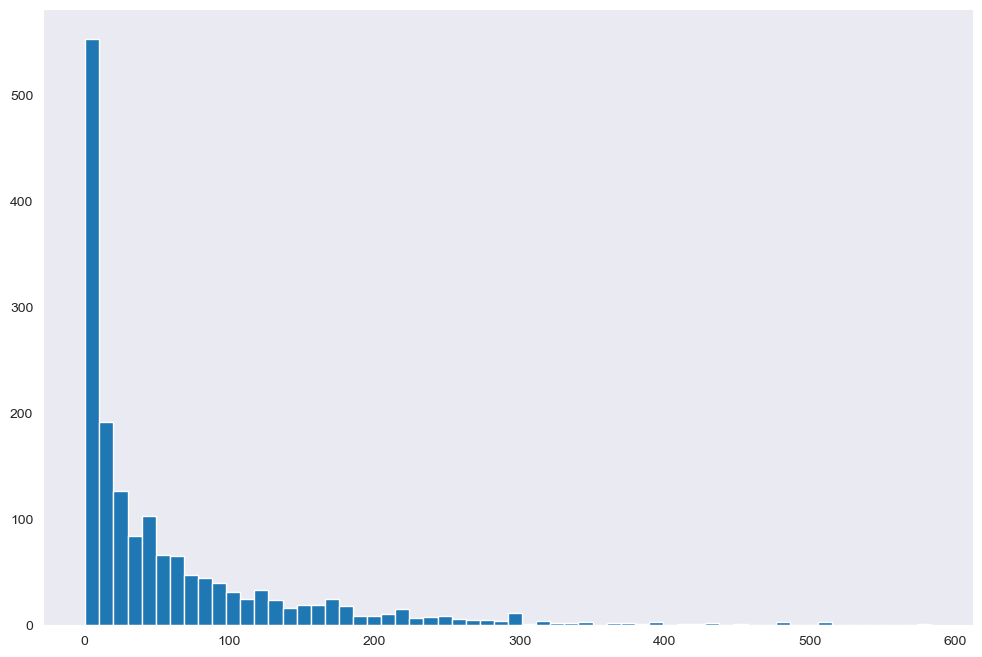

In [18]:
#Lets plot a histogram of number of ratings to check the distribution

plt.figure(figsize=(12,8))
plt.hist(ratings['number of ratings'], bins = 60)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

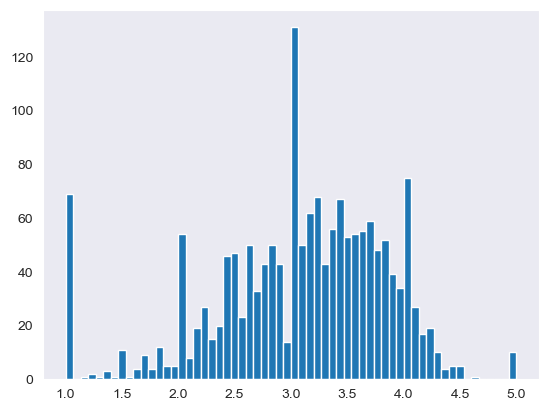

In [19]:
plt.hist(ratings['rating'], bins = 60)
plt.show

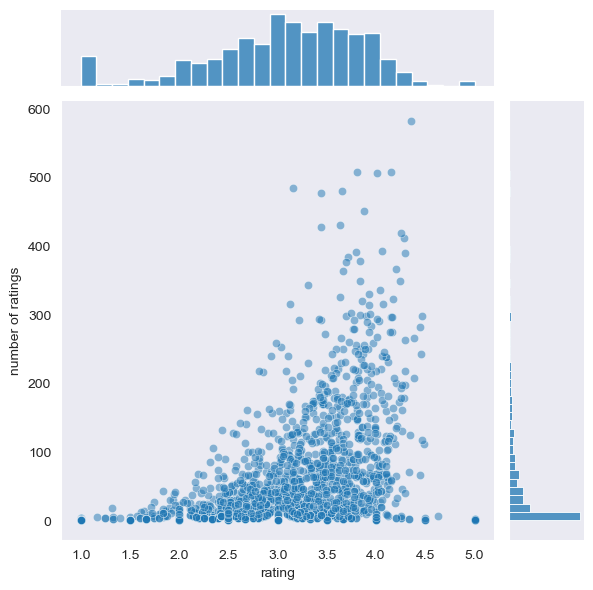

In [20]:
sns.jointplot(x = 'rating', y = 'number of ratings', data= ratings, alpha = 0.5)

The above plot shows that as the rating increases, the number of ratings of that movie also increases. In addition to it, the figure clearly depicts the movies which have been rated by very few people by isolated dots (ends of the x-axis).

Recommendation system

We’ll implement our recommendation model for a single movie at first. Let’s pick Star Wars (1977). First, make a matrix to shows which user has given what rating to which movie.

In [21]:
movimatrix = data.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
print(movimatrix)

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   
...                            ...           ...                    ...   
939                            NaN           NaN                    NaN   
940                            NaN           NaN                    NaN   
941                            NaN           NaN                    NaN   
942                            NaN           NaN                    NaN   
943                            NaN           NaN                    NaN   

title    12 Angry Men (1

In [22]:
movimatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


There are a lot of NaN values because all the users have not watched all the movies.

In [23]:
#Let's check the ratings of one movi

angry_Men = movimatrix['12 Angry Men (1957)']
angry_Men.head()

user_id
1    5.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: 12 Angry Men (1957), dtype: float64

In [24]:
starWars = movimatrix['Star Wars (1977)']
starWars.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [25]:
#Lets find the correlation of starwars movi with other movi

related_starwars = movimatrix.corrwith(starWars)

C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [26]:
related_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [27]:
#correlation does not exist. 

In [28]:
corr_starwars = pd.DataFrame(related_starwars, columns=['correlation'])
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [29]:
corr_starwars.isnull().sum()

correlation    254
dtype: int64

idea behind this is that if a person likes Star Wars, he/she can be recommended the movie with the highest correlation. We had NaN values in our data frame. We’ll remove those using dropna( ) function.

In [30]:
corr_starwars.dropna(inplace=True)

In [31]:
corr_starwars.isnull().sum()

correlation    0
dtype: int64

In [32]:
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [33]:
#We also need number of rating coulumn with correlation column

corr_starwars = corr_starwars.join(ratings['number of ratings'])
corr_starwars.head()

,correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [34]:
corr_starwars[corr_starwars['number of ratings']>100].head(10)

,correlation,number of ratings
title,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2001: A Space Odyssey (1968),0.230884,259
Absolute Power (1997),0.085440,127
"Abyss, The (1989)",0.203709,151
Ace Ventura: Pet Detective (1994),0.062689,103
"Adventures of Priscilla, Queen of the Desert, The (1994)",0.054740,111
"African Queen, The (1951)",0.230540,152
Air Force One (1997),0.113164,431


In [35]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('correlation', ascending=False).head(10)

,correlation,number of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [36]:
# let's check movie related to 'Frighteners'
frighteners_user_ratings = movimatrix['Frighteners, The (1996)']

In [37]:
corr_frighteners = movimatrix.corrwith(frighteners_user_ratings)

C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [38]:
corr_frighteners.head()

title
'Til There Was You (1997)   -1.000000
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.135689
12 Angry Men (1957)          0.335673
187 (1997)                   0.776214
dtype: float64

In [39]:
corr_frighteners.dropna(inplace=True)

In [40]:
similar_to_Frighteners = movimatrix

In [41]:
corr_Frighteners = pd.DataFrame(corr_frighteners, columns=['correlation'])

In [42]:
corr_Frighteners.head()

,correlation
title,
'Til There Was You (1997),-1.000000
101 Dalmatians (1996),0.135689
12 Angry Men (1957),0.335673
187 (1997),0.776214
2 Days in the Valley (1996),0.333473


In [43]:
corr_Frighteners.sort_values('correlation', ascending=False).head(10)

,correlation
title,
"Doom Generation, The (1995)",1.0
"Cure, The (1995)",1.0
"Machine, The (1994)",1.0
Traveller (1997),1.0
"Low Down Dirty Shame, A (1994)",1.0
Go Fish (1994),1.0
"Tin Drum, The (Blechtrommel, Die) (1979)",1.0
Year of the Horse (1997),1.0
Picture Bride (1995),1.0


In [44]:
corr_Frighteners = corr_Frighteners.join(ratings['number of ratings'])
corr_Frighteners

,correlation,number of ratings
title,,
'Til There Was You (1997),-1.000000,9
101 Dalmatians (1996),0.135689,109
12 Angry Men (1957),0.335673,125
187 (1997),0.776214,41
2 Days in the Valley (1996),0.333473,93
...,...,...
Young Frankenstein (1974),0.249497,200
Young Guns (1988),0.629871,101
Young Guns II (1990),0.448543,44


In [45]:
corr_Frighteners[corr_Frighteners['number of ratings']>100].sort_values('correlation', ascending=False).head()

,correlation,number of ratings
title,,
"Frighteners, The (1996)",1.000000,115
Amistad (1997),0.860059,124
Young Guns (1988),0.629871,101
Seven Years in Tibet (1997),0.597323,155
Gattaca (1997),0.586196,136


In [46]:
#This are the related movies to 'Frighteners'

let’s make a general recommendation function now which will give us 5 movie recommendations based on the movie we enter.

In [47]:
def predict_movies(movie_name):
    movie_user_ratings=movimatrix[movie_name]
    similar_to_movie=movimatrix.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['number of ratings'])
    predictions=corr_movie[corr_movie['number of ratings']>100].sort_values('correlation',ascending=False)
    return predictions

predictions=predict_movies("Gattaca (1997)")  #enter movie name from the data set
predictions.head()


C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,correlation,number of ratings
title,,
Gattaca (1997),1.000000,136
"Crow, The (1994)",0.665700,134
Happy Gilmore (1996),0.618853,149
Down Periscope (1996),0.613706,101
"Frighteners, The (1996)",0.586196,115
